## toy example

In [1]:
import matplotlib
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score as AUC

In [10]:
# 1.make some data which has a clear covariate shift
n_samples_Z = 1000
n_samples_X = 100
x = 11*np.random.random(n_samples_Z)- 6.0
y = x**2 + 10*np.random.random(n_samples_Z) - 5
Z = np.c_[x, y]
    
x = 2*np.random.random(n_samples_X) - 6.0
y = x**2 + 10*np.random.random(n_samples_X) - 5
X = np.c_[x, y]

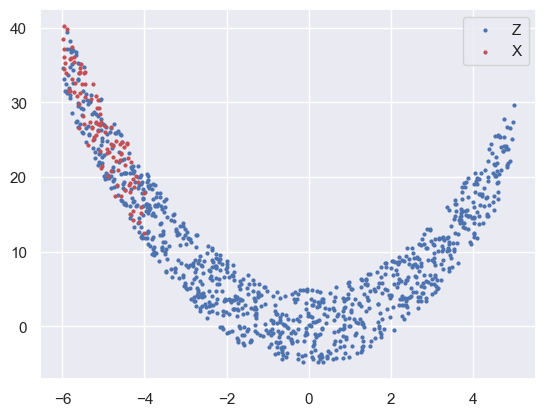

In [3]:
# plot the data
import matplotlib.pyplot as plt

plt.scatter(Z[:,0], Z[:,1], marker='o', s=4, c='b', label='Z')
plt.scatter(X[:,0], X[:,1], marker='o', s=4, c='r', label='X')
plt.legend()

In [4]:
#2.output the ROC-AUC metric for classifier as an estimate how much covariate shift this data has.
X = pd.DataFrame(X)
Z = pd.DataFrame(Z)
X['is_z'] = 0 # 0 means test set
Z['is_z'] = 1 # 1 means training set
XZ = pd.concat( [X, Z], ignore_index=True, axis=0 )

labels = XZ['is_z'].values
XZ = XZ.drop('is_z', axis=1).values
X, Z = X.values, Z.values

In [20]:
# can use a non-linear learner, but make sure to restrict how 
# much it can learn or it will discriminate too well.
clf = RFC(max_depth=2)
# because we can see a learn divide in the above data we 
# could simply use logistic regression here.
# clf = LR()

predictions = np.zeros(labels.shape)
skf = SKF(n_splits=20, shuffle=True, random_state=1234)
for fold, (train_idx, test_idx) in enumerate(skf.split(XZ, labels)):
   # print 'Training discriminator model for fold {}'.format(fold)
    X_train, X_test = XZ[train_idx], XZ[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
        
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)[:, 1]
    predictions[test_idx] = probs

In [21]:
print ('ROC-AUC for X and Z distributions:', AUC(labels, predictions))

ROC-AUC for X and Z distributions: 0.8953150000000001


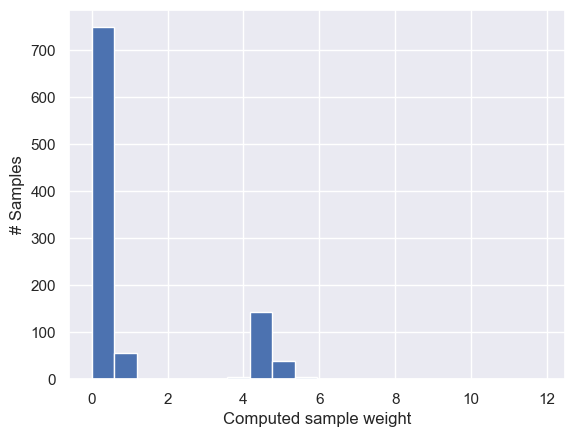

In [22]:
#3.convert the probability of each point belonging to the training distribution into sample weights(beta)

# first, isolate the training part (recall we joined them above)
predictions_Z = predictions[len(X):]
weights = (1. / predictions_Z) - 1. #取倒数再减一，来获得权重
weights /= np.mean(weights)  # 对权重进行归一化处理，来保证权重之和等于1

plt.xlabel('Computed sample weight')
plt.ylabel('# Samples')
plt.hist(weights, bins=20) 
plt.show()

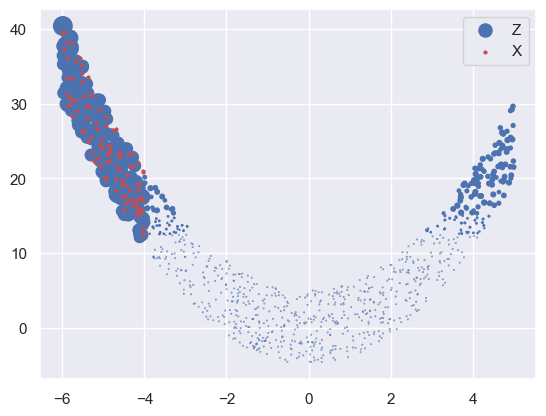

In [23]:
Zsize = 0.1 + weights*15
plt.scatter(Z[:,0], Z[:,1], marker='o', s=Zsize, c='b', label='Z')
plt.scatter(X[:,0], X[:,1], marker='o', s=4, c='r', label='X')
plt.legend()

## kmm algorithm

In [1]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
# create dataset
pipeline = propDEC(input_size=3000, num_classes=6, metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints
Got 2089 / 2187 with accuracy' 95.52%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2008 / 2187 with accuracy' 91.82%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints
Got 2086 / 2187 with accuracy' 95.38%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints
Got 2064 / 2187 with accuracy' 94.38%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2078 / 2187 with accuracy' 95.02%
Early Stopping
==> Finish!


/volume1/home/mhuang/cellTypeAbundance/src/test/propDEC_end2end.py:184: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = self.test_adata.obs.groupby('cell.type').count()/len(self.test_adata)


In [4]:
proportion

,ref,predict_1,predict_2,predict_3,predict_4,predict_5,Ground_truth
OPC,0.144558,0.0153,0.0298,0.0200,0.0241,0.0212,0.014632
astro,0.286735,0.0436,0.0715,0.0444,0.0548,0.0447,0.043439
endo,0.010884,0.0085,0.0146,0.0062,0.0098,0.0075,0.002286
mg,0.047279,0.0070,0.0132,0.0084,0.0124,0.0104,0.009145
neuron,0.041837,0.0447,0.0686,0.0571,0.0608,0.0616,0.044353
oligo,0.468707,0.8809,0.8023,0.8639,0.8380,0.8546,0.886145


In [5]:
f1scores

,predict_1,predict_2,predict_3,predict_4,predict_5
f1score_micro,0.955190,0.918153,0.953818,0.943759,0.950160
f1score_macro,0.760586,0.715786,0.777620,0.757221,0.783294


In [6]:
precision

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.687500,0.500000,0.613636,0.563636,0.600000
astro,0.936170,0.572327,0.903226,0.777778,0.894737
endo,0.357143,0.277778,0.500000,0.333333,0.384615
mg,0.857143,0.789474,0.733333,0.714286,0.789474
neuron,0.752688,0.626667,0.695312,0.654676,0.657143
oligo,0.975258,0.996065,0.985767,0.995109,0.989840


In [7]:
recall

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.687500,0.968750,0.843750,0.968750,0.937500
astro,0.926316,0.957895,0.884211,0.957895,0.894737
endo,1.000000,1.000000,1.000000,1.000000,1.000000
mg,0.600000,0.750000,0.550000,0.750000,0.750000
neuron,0.721649,0.969072,0.917526,0.938144,0.948454
oligo,0.976264,0.914345,0.964912,0.944788,0.955108
